# SCRIPT DE EXPLORACIÓN CAJAMAR_WATER_FOOTPRINT
## ESQUEMA RESUMEN DE LAS CLASES CREADAS PARA EL PROYECTO
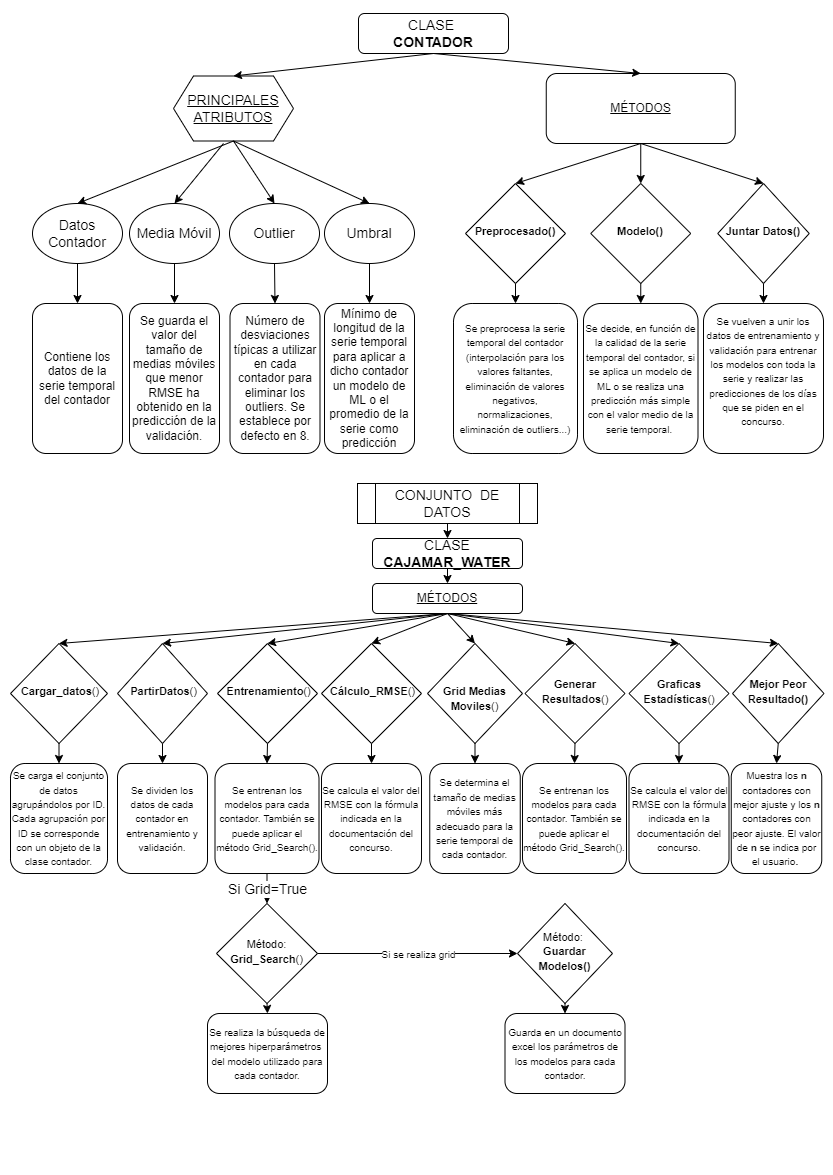

## DESCRIPCIÓN ENUNCIADO COLUMNAS DATASET

*   ID: Identificador del Contador que registra la medida de lectura.
*   SAMPLETIME: Fecha y hora del consumo en formato UTC. Momento en el que se 
produce el mensaje o el contador ha emitido el registro.
*   READINGINTEGER: Medida registrada por el contador en litros. Parte entera.
*   READINGTHOUSANDTH: Medida registrada por el contador en litros. Parte decimal.
*   DELTAINTEGER: Consumo calculado en litros a partir de la medida registrada por el contador. Parte entera.
*   DELTATHOUSANDTH: Consumo calculado en litros a partir de la medida registrada por el contador. Parte decimal.


### CARGAMOS DATOS Y PEQUEÑA VISUALIZACIÓN

In [ ]:
# Carga Fichero
import pandas as pd
path="/content/drive/MyDrive/Cajamar/"
datos = pd.read_csv(path+'Modelar_UH2022.txt',sep='|',parse_dates=['SAMPLETIME'],infer_datetime_format=True) #El enunciado nos indica la columna fecha
print(datos.head(5))
print(datos.describe())
print(datos.dtypes)

   ID          SAMPLETIME  READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  \
0   0 2019-06-13 08:34:09          369320                0.0            17   
1   0 2019-06-13 17:34:10          369403                0.0             2   
2   0 2019-06-13 18:34:10          369403                0.0             0   
3   0 2019-06-13 04:34:10          369284                0.0             1   
4   0 2019-06-13 14:34:10          369356                0.0            28   

   DELTATHOUSANDTH  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
                 ID  READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  \
count  2.140483e+07    2.140483e+07       2.126477e+07  2.140483e+07   
mean   1.259029e+03    6.052178e+05       3.930737e+00  2.277017e+01   
std    7.334956e+02    2.857464e+06       1.496893e+01  1.516794e+03   
min    0.000000e+00   -6.407800e+04       0.000000e+00 -5.307340e+05   
25%    6.230000e+02    6.368800e+04       0.0

## Detectamos columnas con Nans, las columnas con Nans son las que forman la parte decimal de los datos, su media tiende a 0, la acción elegida es sustituir los Nan por 0.

In [ ]:
print(datos.isnull().any())
print(str(datos['READINGTHOUSANDTH'].isna().sum())+" de "+str(len(datos['READINGTHOUSANDTH'])))
print(str(datos['DELTATHOUSANDTH'].isna().sum())+" de "+str(len(datos['DELTATHOUSANDTH']))) 
datos.fillna(0, inplace=True)
print(datos.isnull().any())

ID                   False
SAMPLETIME           False
READINGINTEGER       False
READINGTHOUSANDTH     True
DELTAINTEGER         False
DELTATHOUSANDTH       True
dtype: bool
140056 de 21404828
140056 de 21404828
ID                   False
SAMPLETIME           False
READINGINTEGER       False
READINGTHOUSANDTH    False
DELTAINTEGER         False
DELTATHOUSANDTH      False
dtype: bool


# COLUMNA ID
## Comprabamos los valores únicos.
### Se puede apreciar que la columna ID es una lista de números de 0 a 2756 con huecos. Se verifican los IDs vacios. 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(datos["ID"].describe())
print("total únicos: "+str(datos["ID"].nunique()))
print("No coincide con: 2756")
print("#####")
lista=[]
rango=range(2756)
for unique in pd.unique(datos["ID"]):
    lista.append(unique)
for rango in rango:
  if (rango in lista)==False:
    print(rango)
    print(datos[datos["ID"]==rango])     

count   21404828
mean        1259
std          733
min            0
25%          623
50%         1255
75%         1887
max         2756
Name: ID, dtype: float64
total únicos: 2747
No coincide con: 2756
#####
2726
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2738
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2740
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2741
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2750
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2751
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2752
Empty DataFrame
Columns: [ID, SAMPLETIME, READING

# COLUMNA SAMPLETIME
## El rango maximo y minimo son 2020-01-31 23:59:59 y 2019-02-01 00:00:00, más adelante comprobaremos si todos los IDs cuenta con este rango.

In [ ]:
print(datos.SAMPLETIME.max())
print(datos.SAMPLETIME.min())

2020-01-31 23:59:59
2019-02-01 00:00:00


# COLUMNA READINGINTEGER
## Se elimina el dato negativo

In [ ]:
print(datos['READINGINTEGER'].describe())
datos=datos[datos['READINGINTEGER']>0]
print(datos['READINGINTEGER'].describe())

count   21404828
mean      605218
std      2857464
min       -64078
25%        63688
50%       183157
75%       352050
max     51089763
Name: READINGINTEGER, dtype: float64
count   21345904
mean      606904
std      2861225
min            1
25%        64424
50%       183855
75%       352843
max     51089763
Name: READINGINTEGER, dtype: float64


# COLUMNA READINGTHOUSANDTH
## Datos entre 0 y 100 son aceptados

In [ ]:
print(datos['READINGTHOUSANDTH'].describe())

count   21345904
mean           4
std           15
min            0
25%            0
50%            0
75%            0
max           99
Name: READINGTHOUSANDTH, dtype: float64


# COLUMNA DELTAINTEGER
## Se eliminan datos negativos.

In [ ]:
print(datos['DELTAINTEGER'].describe())
datos=datos[datos['DELTAINTEGER']>0]
print(datos['DELTAINTEGER'].describe())
#datos=datos[datos['DELTAINTEGER']<5000]
print(datos['DELTAINTEGER'].describe())

count   21345904
mean          23
std         1519
min      -530734
25%            0
50%            0
75%            9
max       949981
Name: DELTAINTEGER, dtype: float64
count   10364967
mean          47
std         2171
min            1
25%            4
50%           10
75%           24
max       949981
Name: DELTAINTEGER, dtype: float64
count   10364967
mean          47
std         2171
min            1
25%            4
50%           10
75%           24
max       949981
Name: DELTAINTEGER, dtype: float64


 # COLUMNA DELTATHOUSANDTH
 ## Datos entre 0 y 100 son aceptados

In [ ]:
print(datos['DELTATHOUSANDTH'].describe())

count   10364967
mean           8
std           21
min            0
25%            0
50%            0
75%            0
max           99
Name: DELTATHOUSANDTH, dtype: float64


# CREAMOS CONTADORES POR ID PARA ANALIZAR

### Clases para analizar

In [ ]:
# Librerias
from tqdm import tqdm
from datetime import timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

class Contador(object):
    def __init__(self, datos_contador, ID):
        self.datos_contador = datos_contador
        self.ID = ID
        self.Preprocesado()       
        self.DiffConsumo = 0
        if not datos_contador.empty:
            # CALCULO LECTURA CONTADOR Y CONSUMO JUNTANDO DECIMALES         
            self.datos_contador = self.datos_contador.set_index('SAMPLETIME')
            self.datos_contador['CONSUMO'] = self.datos_contador['DELTAINTEGER'] + (self.datos_contador['DELTATHOUSANDTH'] / 100)
            self.datos_contador['LECTURA'] = self.datos_contador['READINGINTEGER'] + (self.datos_contador['READINGTHOUSANDTH'] / 100)

            ##NORMALIZACIÓN
            self.datos_contador['CONSUMO_NORMA'] = (self.datos_contador['CONSUMO']-self.datos_contador['CONSUMO'].mean())/self.datos_contador['CONSUMO'].std()

            # CONSUMO POR DIAS            
            self.datos_consumo = pd.DataFrame(self.datos_contador['CONSUMO'].resample(rule='1D', closed='left', label ='left').sum())
            self.datos_consumo['CONSUMO_NORM'] = (self.datos_consumo['CONSUMO'] - self.datos_consumo['CONSUMO'].mean()) / self.datos_consumo['CONSUMO'].std()
            #CÁLCULO DE LA DIFERENCIA DE LECTURAS EN CADA PASO DE TIEMPO PARA OBTENER EL CONSUMO A PARTIR DE LA LECTURA
            self.datos_contador['CONSUMO_CAL'] = self.datos_contador['LECTURA'].diff(1).fillna(0)
            self.__Comprobar_Consumo()
            # COGER SOLO SEMANAS COMPLETAS           
            self.datos_consumo_semanal = pd.DataFrame(self.datos_contador['CONSUMO'].resample(rule='1W', closed='left', label ='left',offset='-36h').sum())            
            # ESTADISTICAS
            self.dias = len(self.datos_consumo.index)
            self.semanas = len(self.datos_consumo_semanal.index)
            self.fecha_inicio_contador= self.datos_consumo.index[0]
            self.fecha_fin_contador= self.datos_consumo.index[-1]    

            #CÁLCULO DE LA DIFERENCIA DE LECTURAS EN CADA PASO DE TIEMPO PARA OBTENER EL CONSUMO A PARTIR DE LA LECTURA
            self.datos_contador['CONSUMO_CAL'] = self.datos_contador['LECTURA'].diff(1).fillna(0)

        else:
            self.datos_consumo = pd.DataFrame()   
    def Preprocesado(self):
        # VALORES ENTEROS INTERPOLAMOS               
        # VALORES DECIMALES SUSTITUIMOS POR CERO
        self.datos_contador['READINGTHOUSANDTH'].fillna(0,inplace=True)
        self.datos_contador['DELTATHOUSANDTH'].fillna(0,inplace=True)       
        # ELIMINAR VALORES NEGATIVOS
        indices = self.datos_contador[self.datos_contador['READINGINTEGER'] < 0].index
        self.datos_contador.drop(indices,inplace=True)
        indices = self.datos_contador[self.datos_contador['DELTAINTEGER'] < 0].index
        self.datos_contador.drop(indices,inplace=True)
        # NORMALIZAR

    def __Comprobar_Consumo(self):
        # COMPRUEBA SI HAY MAS DE 1 LITRO DE DIFERENCIA ENTRE EL CONSUMO EL CALCULO DEL CONSUMO CON LA LECTURA DEL CONTADOR
        # EL VALOR ACUMULADO SE GUARDA EN DiffConsumo
        if not(self.datos_contador['CONSUMO_CAL'].equals(self.datos_contador['CONSUMO'])):
            for index, row in self.datos_contador.iterrows():
                if row['CONSUMO_CAL'] != row['CONSUMO'] and (np.absolute(row['CONSUMO_CAL'] - row['CONSUMO']) > 1):
                    #print(row['CONSUMO_CAL'] - row['CONSUMO'])
                    #print(index,row)
                    self.DiffConsumo += np.absolute(row['CONSUMO_CAL'] - row['CONSUMO'])


class CajaMar_Water(object):
    def __init__(self,Ruta_Datos):
        self.Ruta_Datos = Ruta_Datos
        self.datos = pd.DataFrame()
        self.contadores = []
        self.Cargar_Datos()
    def Cargar_Datos(self):
        print('CARGANDO DATOS.....')
        self.datos = pd.read_csv(self.Ruta_Datos,sep='|',parse_dates=['SAMPLETIME'],infer_datetime_format=True,encoding='utf-8')
        self.datos.sort_values(by=['ID','SAMPLETIME'],inplace=True) 
        # GENERANDO CONTADORES
        print('GENERANDO CONTADORES.....')
        for ID in tqdm(pd.unique(self.datos['ID'])):
            # ALMACENAMOS ID DE CONTADOR Y BORRAMOS LA COLUMNA
            self.contadores.append(Contador(self.datos[self.datos['ID']==ID].drop('ID',axis=1),ID))
        print('PROCESO DE CARGA FINALIZADO')

### Creamos clase

In [ ]:
#proyecto=CajaMar_Water(path+'Modelar_UH2022_10_Contadores.txt')
proyecto=CajaMar_Water('Modelar_UH2022.txt')

CARGANDO DATOS.....
GENERANDO CONTADORES.....


100%|██████████| 2747/2747 [21:09<00:00,  2.16it/s]

PROCESO DE CARGA FINALIZADO


# Contadores con fecha maxima menor que 2020-01-31

In [ ]:
contadores_no_ultima_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[-1].date()<datos.SAMPLETIME.max().date():
      contadores_no_ultima_fecha.append(contadores.ID)
  else:
    contadores_no_ultima_fecha.append(contadores.ID)


print(str(len(contadores_no_ultima_fecha))+" de "+str(2747)+" no llegan a 2020-01-31")

117 de 2747 no llegan a 2020-01-31


In [ ]:
contadores_mas_ultima_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[-1].date()>datos.SAMPLETIME.max().date():
      contadores_mas_ultima_fecha.append(contadores.ID)
  else:
    contadores_mas_ultima_fecha.append(contadores.ID)

print(str(len(contadores_mas_ultima_fecha))+" de "+str(2747)+" no llegan a 2020-01-31")

2 de 2747 no llegan a 2020-01-31


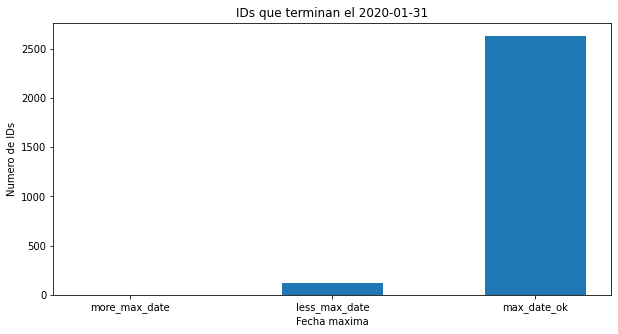

In [ ]:
data_dict = {'more_max_date':len(contadores_mas_ultima_fecha),'less_max_date':len(contadores_no_ultima_fecha),
             'max_date_ok':(2747-len(contadores_mas_ultima_fecha)-len(contadores_no_ultima_fecha))}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, width = 0.5)
plt.xlabel("Fecha maxima")
plt.ylabel("Numero de IDs")
plt.title("IDs que terminan el 2020-01-31")
plt.show()

# Contadores con fecha minima mayor que 2019-02-01

In [ ]:
contadores_no_primera_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[0].date()>datos.SAMPLETIME.min().date():
      contadores_no_primera_fecha.append(contadores.ID)
  else:
    contadores_no_primera_fecha.append(contadores.ID)

print(str(len(contadores_no_primera_fecha))+" de "+str(2747)+" no empiezan por 2019-02-01")

500 de 2747 no empiezan por 2019-02-01


In [ ]:
contadores_menos_primera_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[0].date()<datos.SAMPLETIME.min().date():
      contadores_menos_primera_fecha.append(contadores.ID)
  else:
    contadores_menos_primera_fecha.append(contadores.ID)

print(str(len(contadores_menos_primera_fecha))+" de "+str(2747)+" empiezan antes que el 2019-02-01")

2 de 2747 empiezan antes que el 2019-02-01


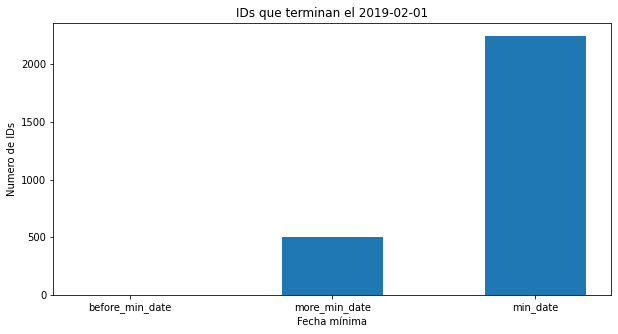

In [ ]:
data_dict = {'before_min_date':len(contadores_menos_primera_fecha),'more_min_date':len(contadores_no_primera_fecha), 
             'min_date':(2747-len(contadores_no_primera_fecha)-len(contadores_menos_primera_fecha))}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.5)
plt.xlabel("Fecha mínima")
plt.ylabel("Numero de IDs")
plt.title("IDs que terminan el 2019-02-01")
plt.show()

## CONTIENE 365 dias:

In [ ]:
contiene_menos_365=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if len(contadores.datos_consumo)<365:
      contiene_menos_365.append(contadores.ID)
  else:
    contiene_menos_365.append(contadores.ID)

print(str(len(contiene_menos_365))+" de "+str(2747)+" tienen menos de 365")

545 de 2747 tienen menos de 365


In [ ]:
contiene_mas_365=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if len(contadores.datos_consumo)>365:
      contiene_mas_365.append(contadores.ID)
  else:
    contiene_mas_365.append(contadores.ID)

print(str(len(contiene_mas_365))+" de "+str(2747)+" tienen mas de 365")

2 de 2747 tienen mas de 365


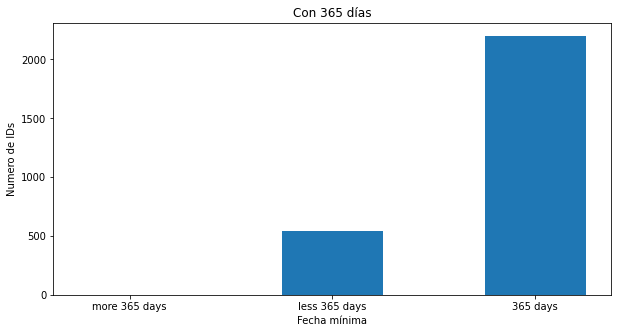

In [ ]:
data_dict = {'more 365 days':len(contiene_mas_365),'less 365 days':len(contiene_menos_365),'365 days':(2747-len(contiene_menos_365)-len(contiene_mas_365))}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.5)
plt.xlabel("Fecha mínima")
plt.ylabel("Numero de IDs")
plt.title("Con 365 días")
plt.show()

# Contadores diferencia entre el sumatorio LECTURA y CONSUMO

In [ ]:
contadores_error_1=[]
contadores_error_2=[]
contadores_error_3=[]
contadores_error_4=[]
contadores_error_5=[]
contadores_error_6=[]
for contadores in proyecto.contadores:
  if(contadores.DiffConsumo<10):
    contadores_error_1.append(contadores.ID)
  if(contadores.DiffConsumo>10):
    contadores_error_2.append(contadores.ID)
    if(contadores.DiffConsumo>100):
      contadores_error_3.append(contadores.ID)
      if(contadores.DiffConsumo>1000):
        contadores_error_4.append(contadores.ID)
        if(contadores.DiffConsumo>10000):
          contadores_error_5.append(contadores.ID)
          if(contadores.DiffConsumo>100000):
            contadores_error_6.append(contadores.ID)


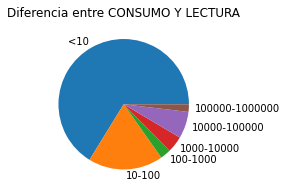

In [ ]:
y = np.array([len(contadores_error_1),
              (len(contadores_error_2)-len(contadores_error_3)), 
              (len(contadores_error_3)-len(contadores_error_4)), 
              (len(contadores_error_4)-len(contadores_error_5)),
              (len(contadores_error_5)-len(contadores_error_6)),
                len(contadores_error_6)])
mylabels = ["<10", "10-100", "100-1000", "1000-10000","10000-100000","100000-1000000"]
plt.title("Diferencia entre CONSUMO Y LECTURA")
plt.pie(y, labels = mylabels)
plt.show() 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def plot(consumo,lectura,ID):
  # Create figure
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14, 5)

  consumo.plot(ax=axes[0])
  axes[0].set_title(ID)
  axes[0].set_ylabel('CONSUMO')
  lectura.plot(ax=axes[1])
  axes[1].set_title(ID)
  axes[1].set_ylabel('LECTURA')

# PEORES CASOS DIFERENCIA
## Se puede observar outliers, datos temporales vacios como también comportarmientos irregulares. 

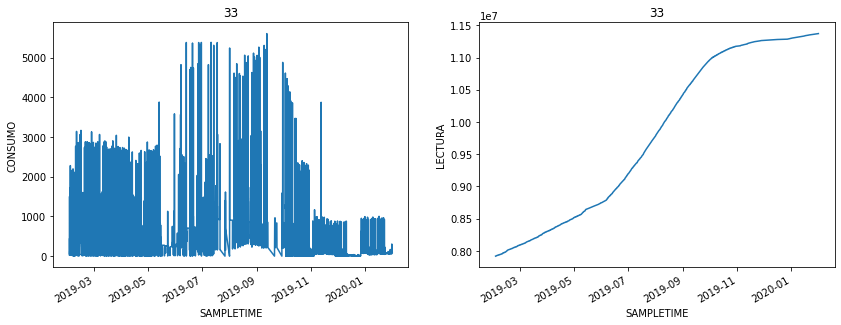

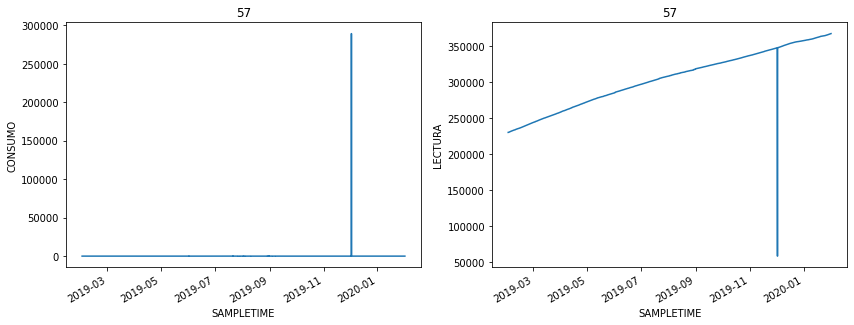

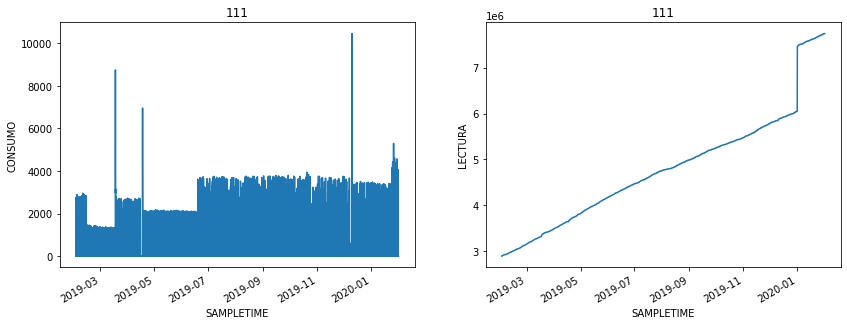

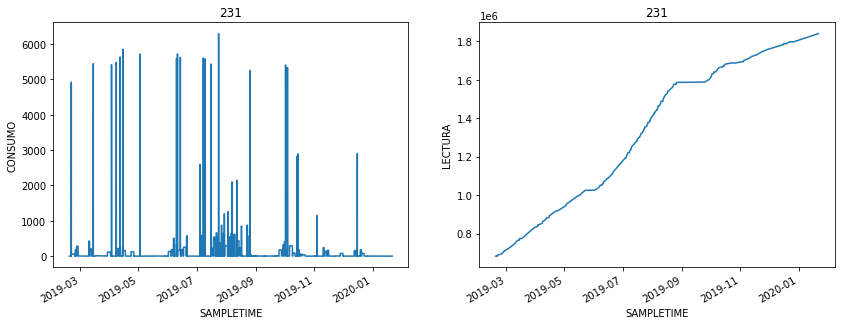

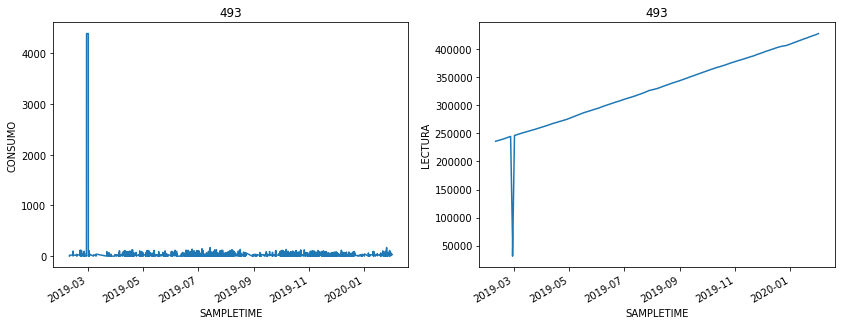

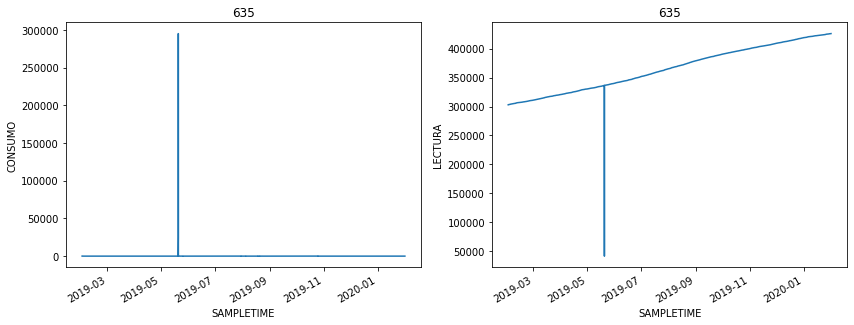

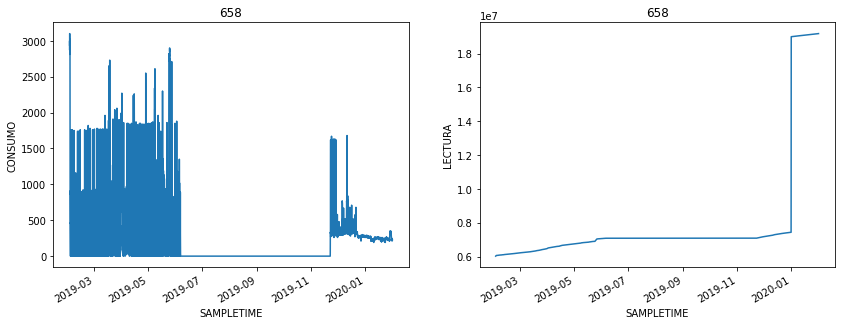

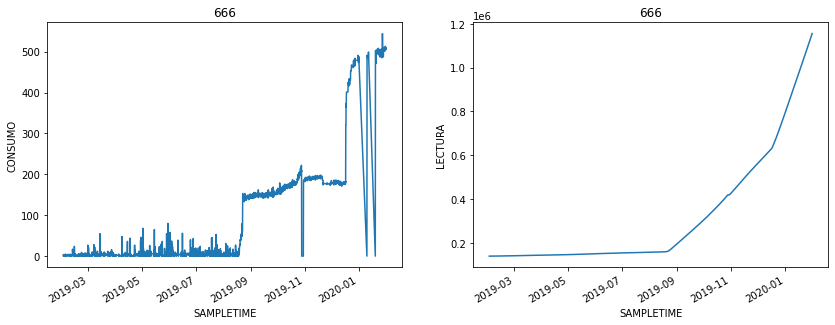

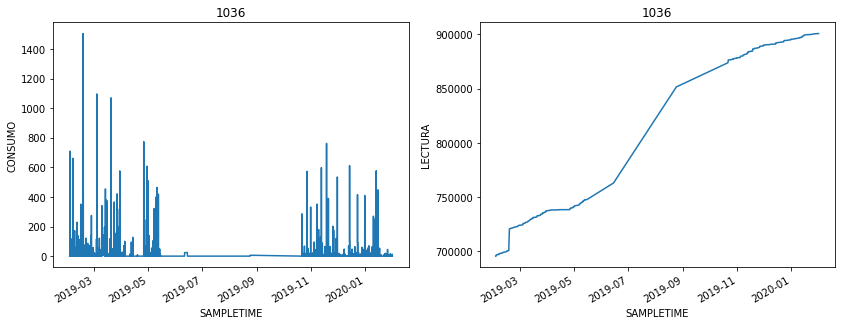

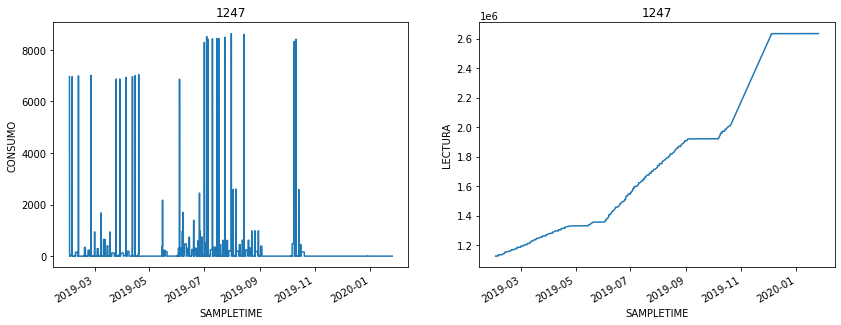

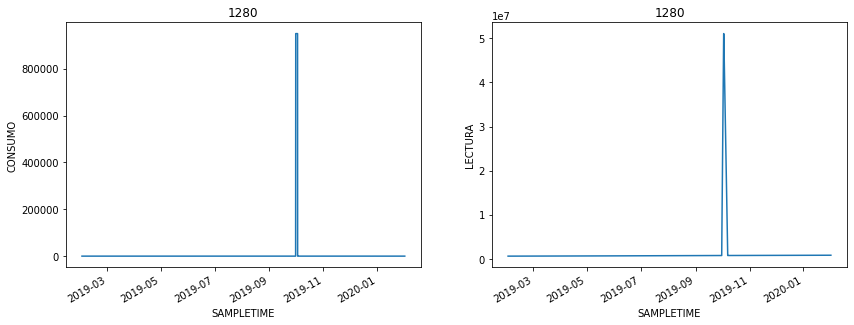

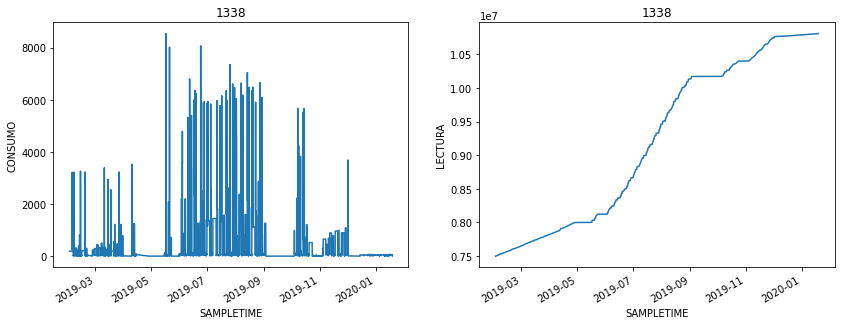

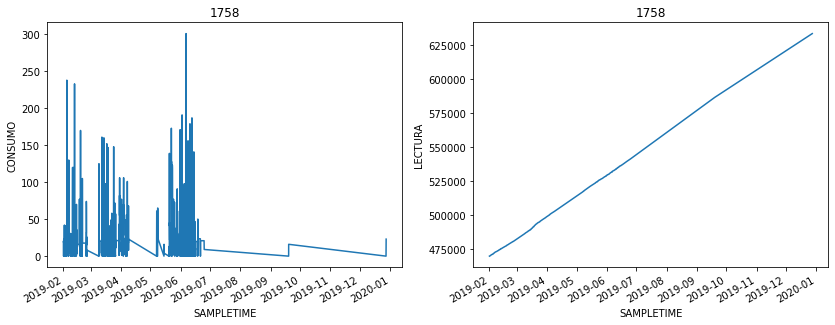

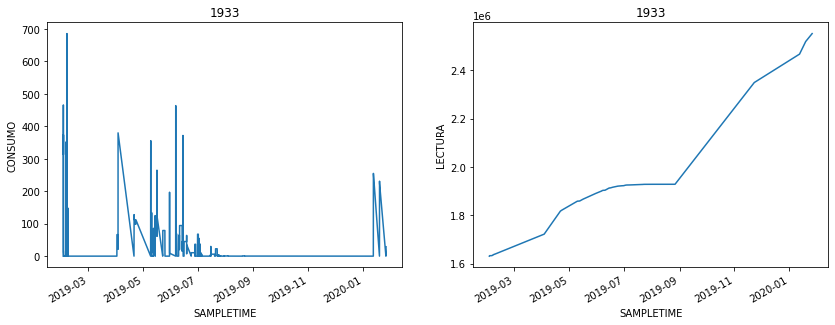

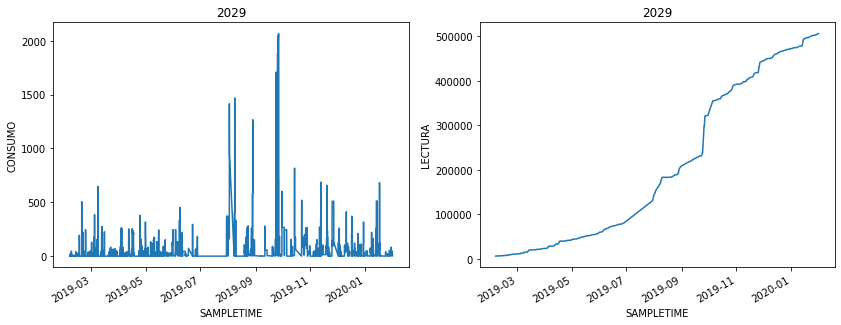

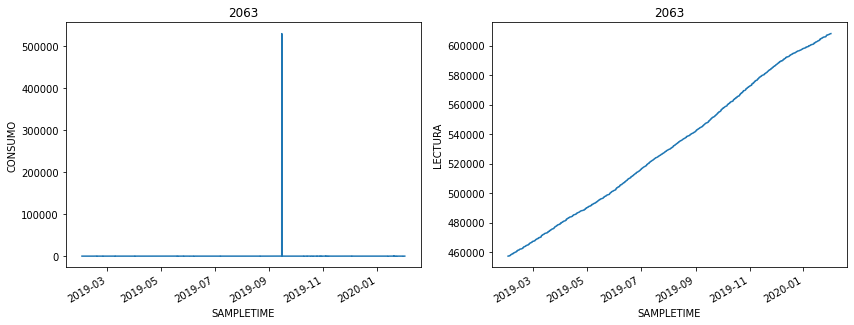

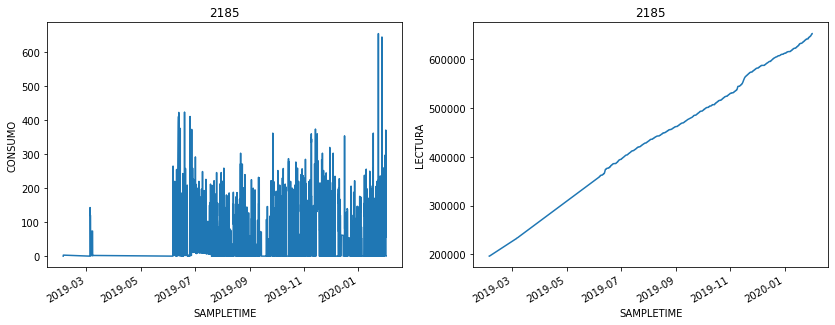

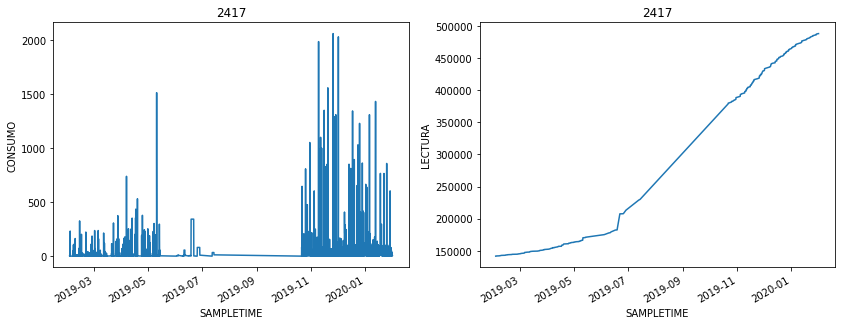

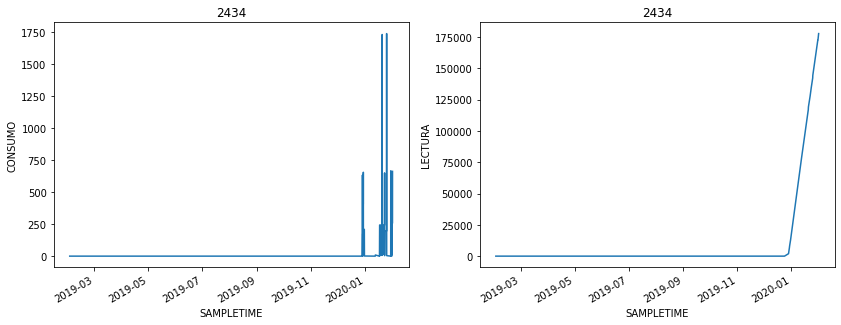

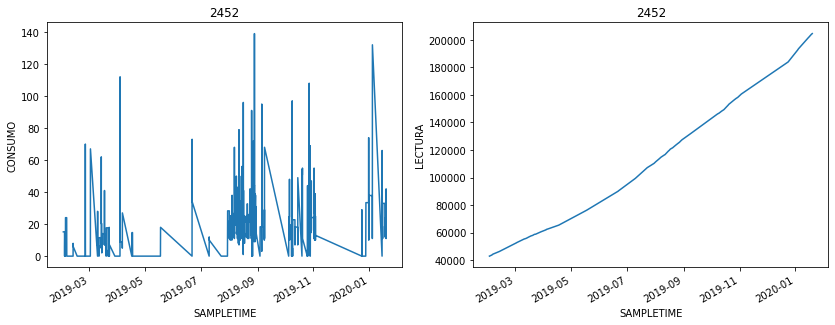

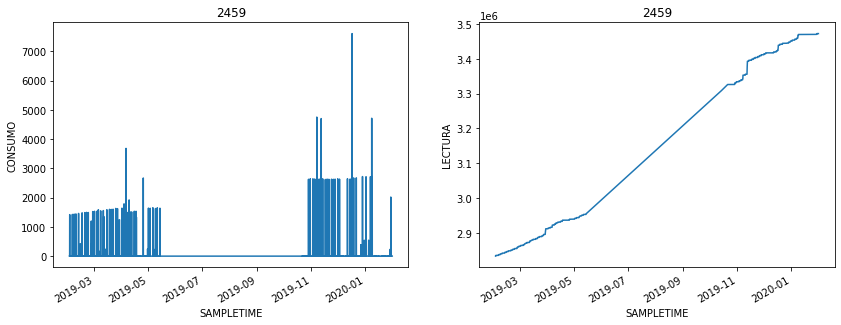

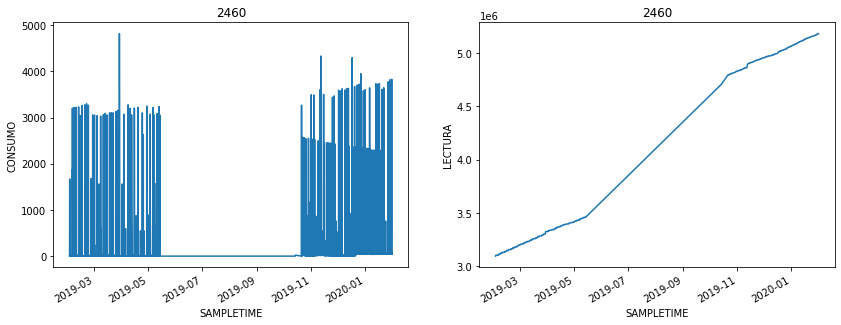

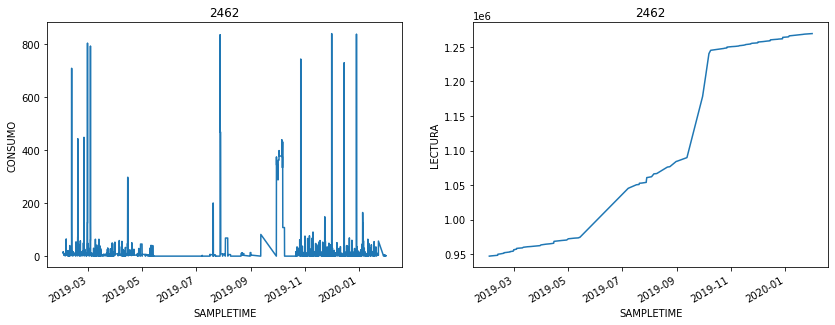

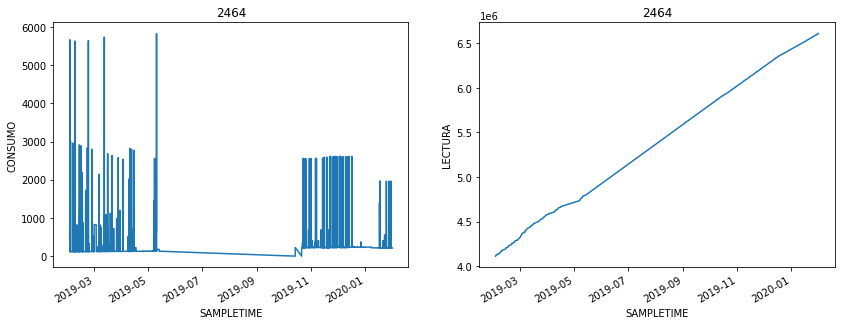

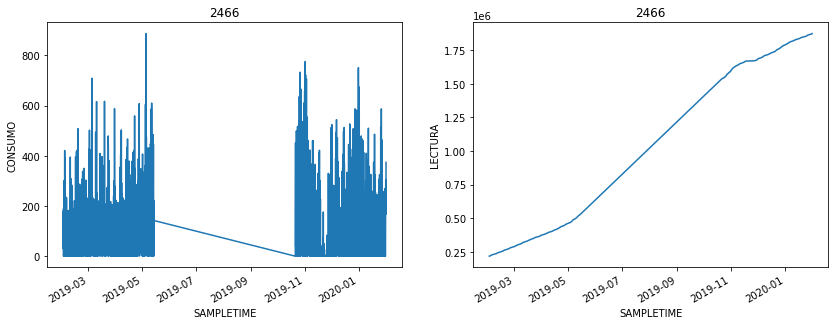

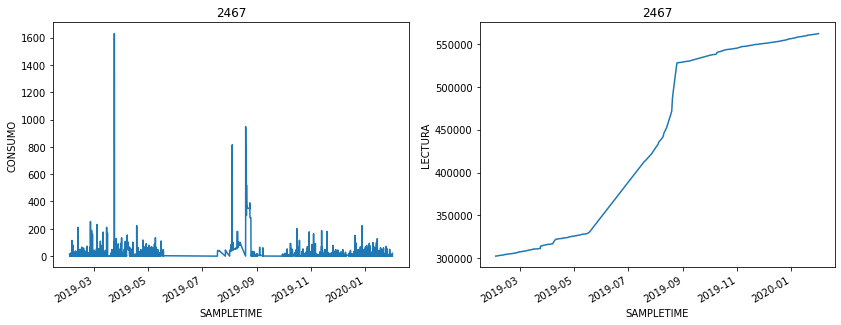

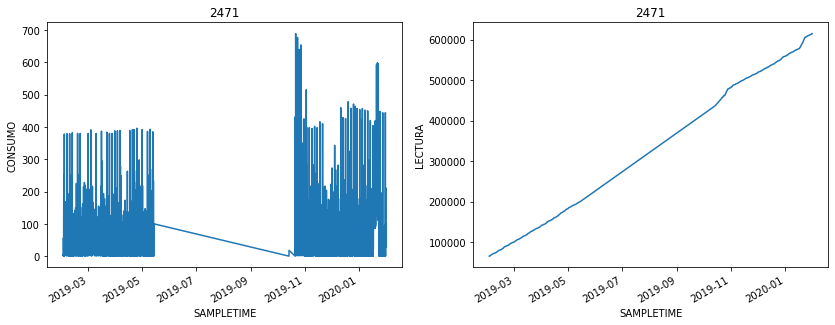

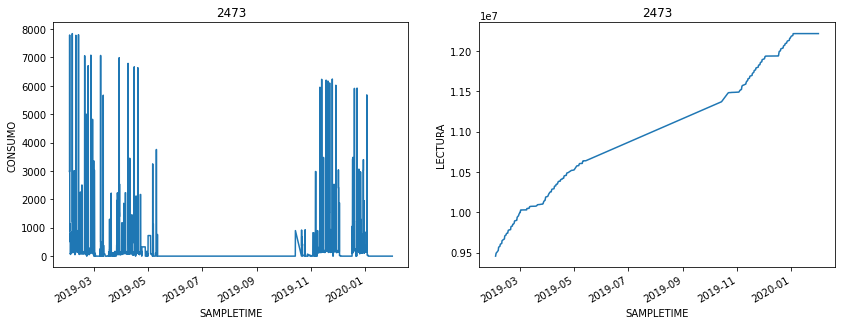

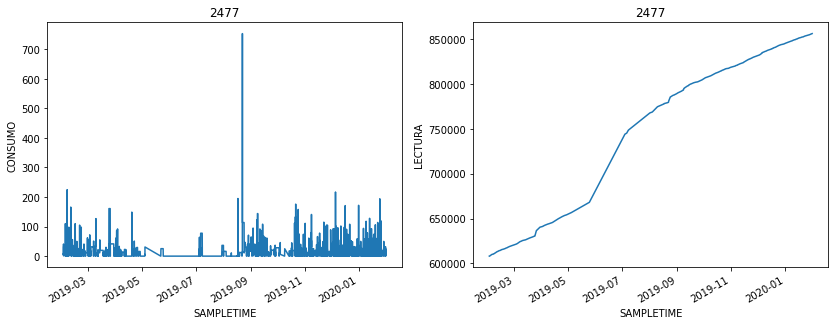

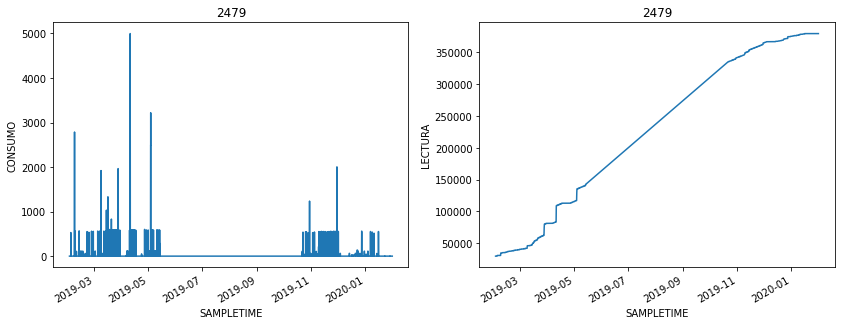

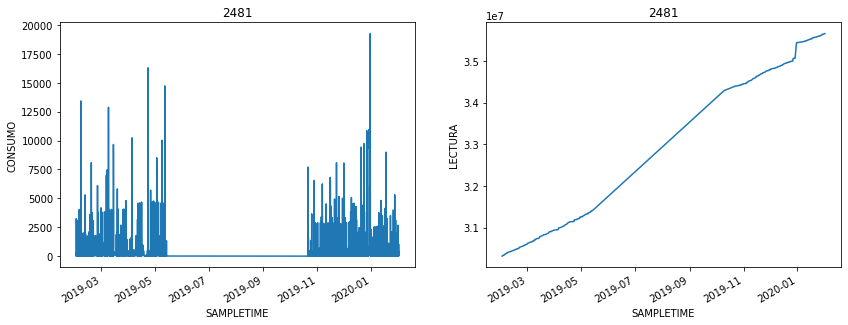

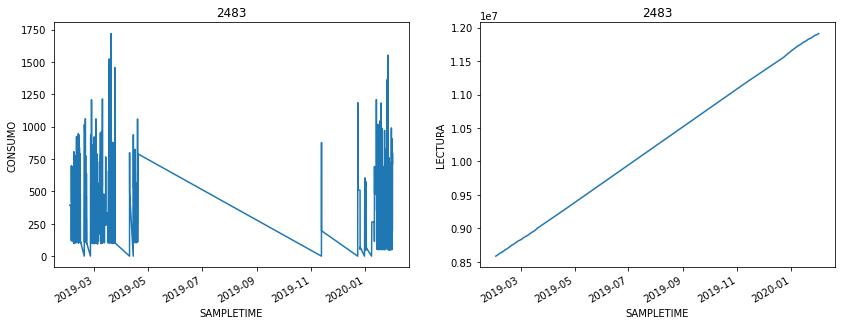

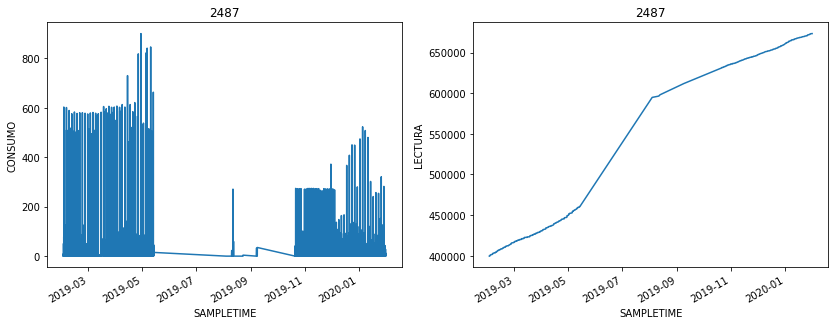

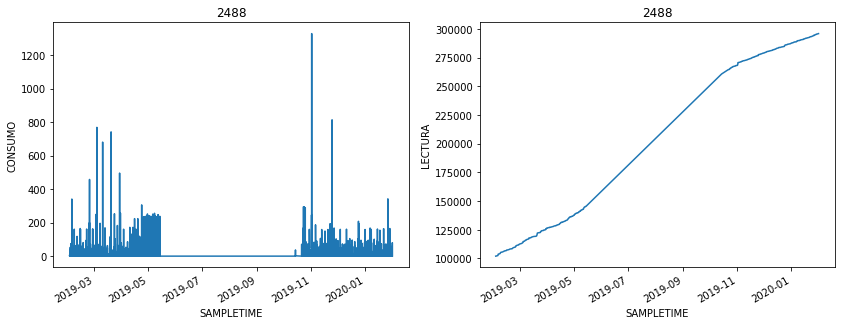

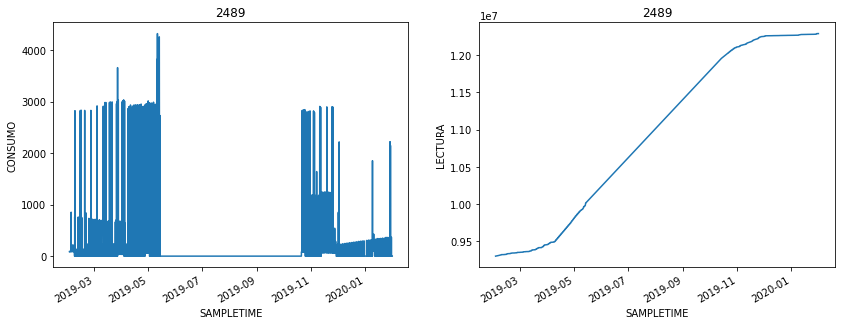

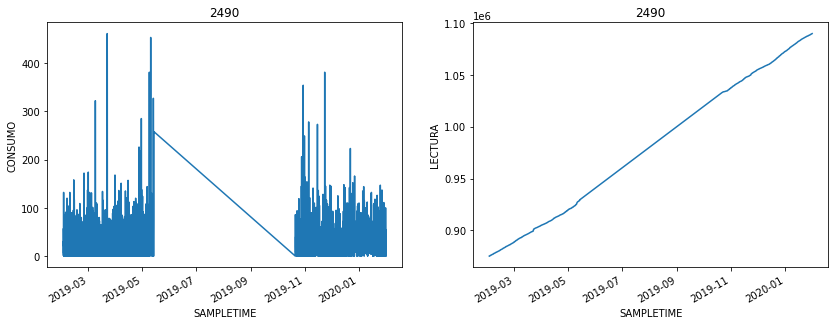

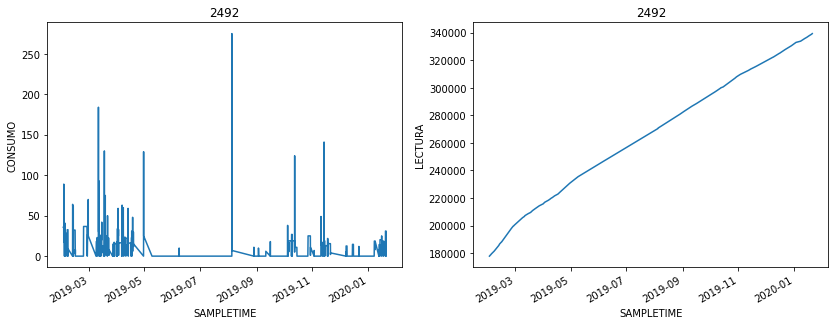

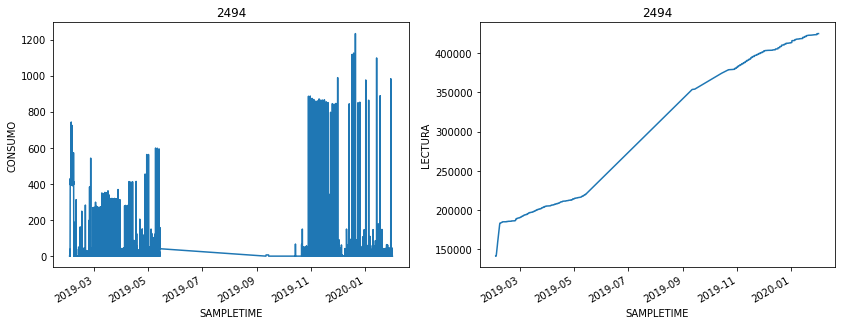

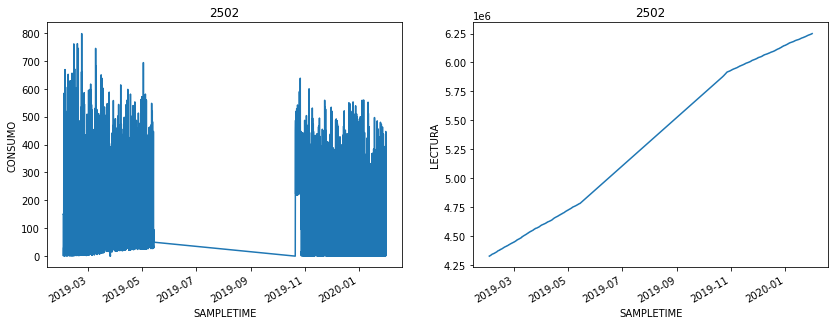

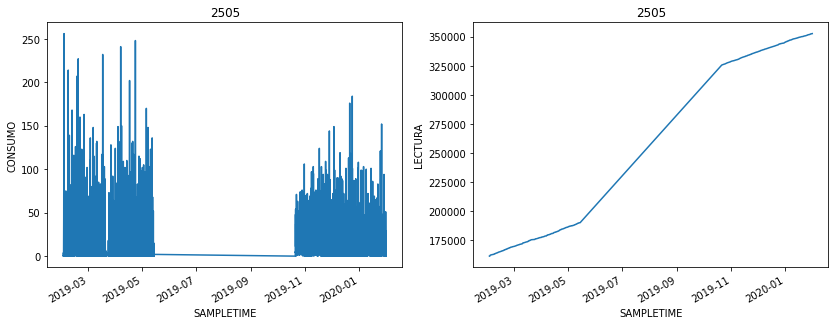

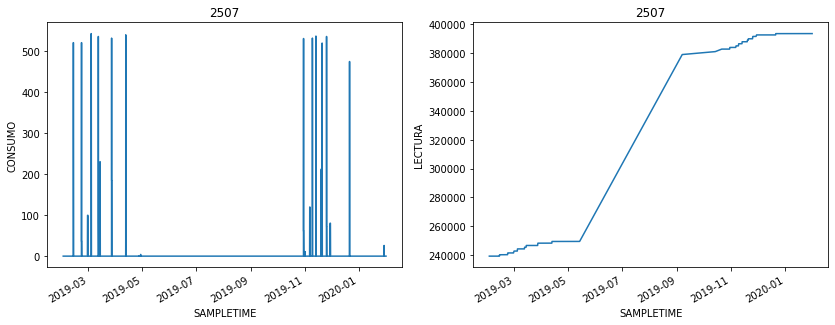

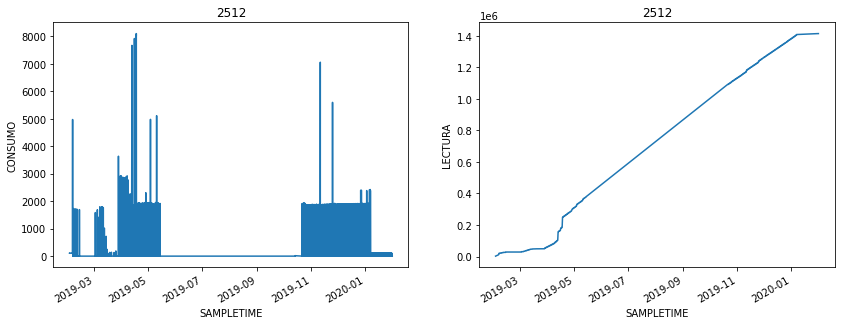

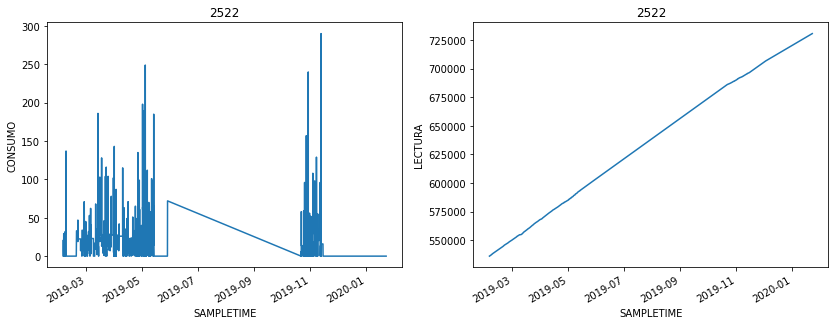

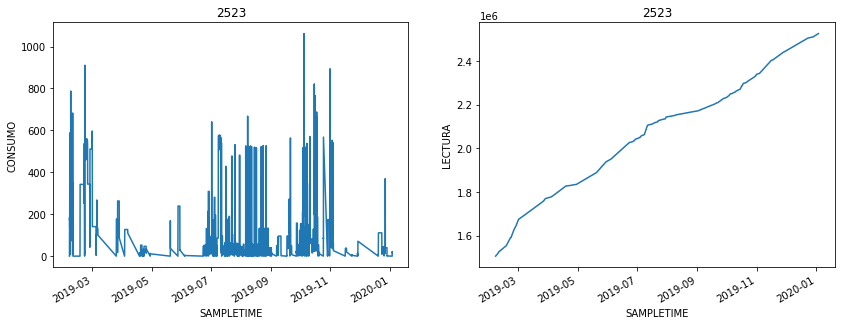

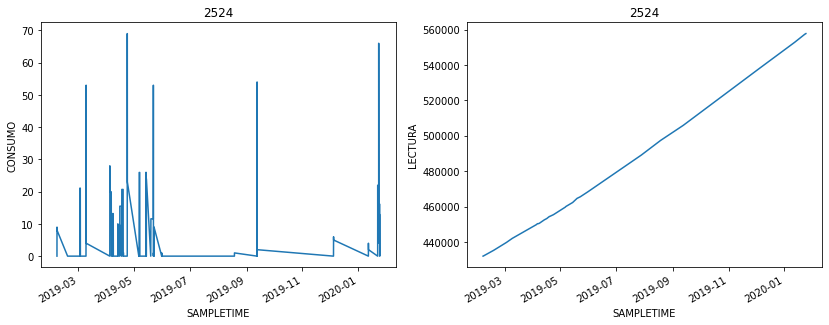

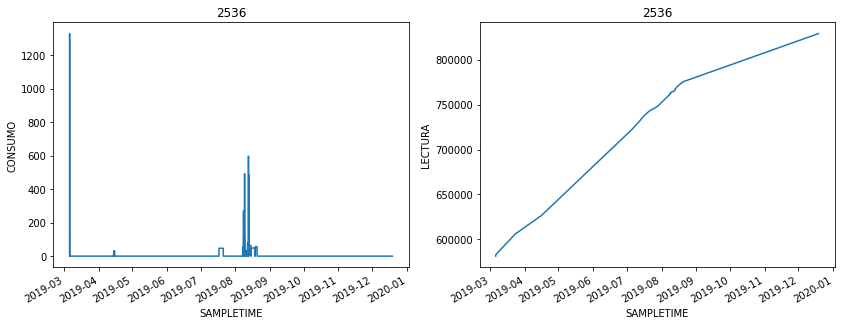

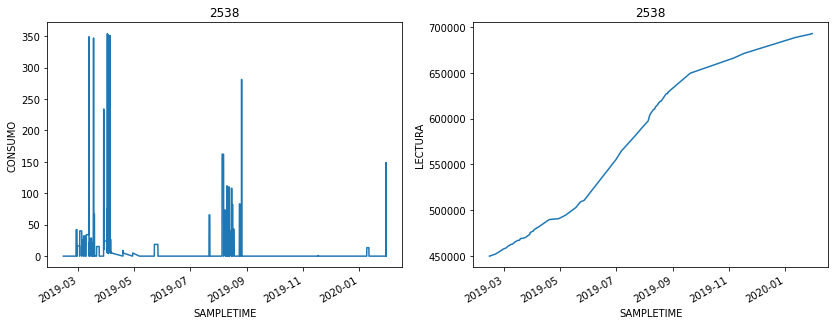

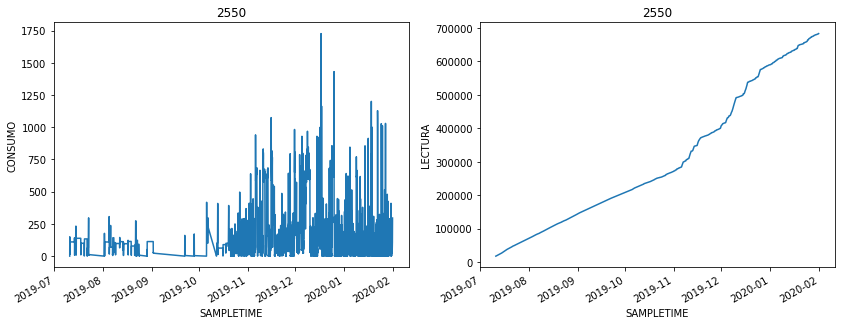

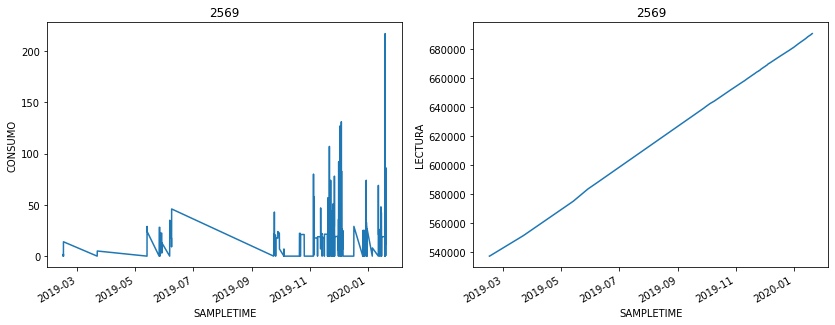

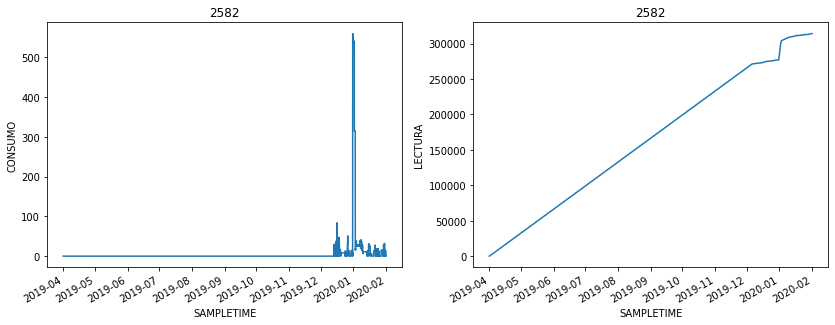

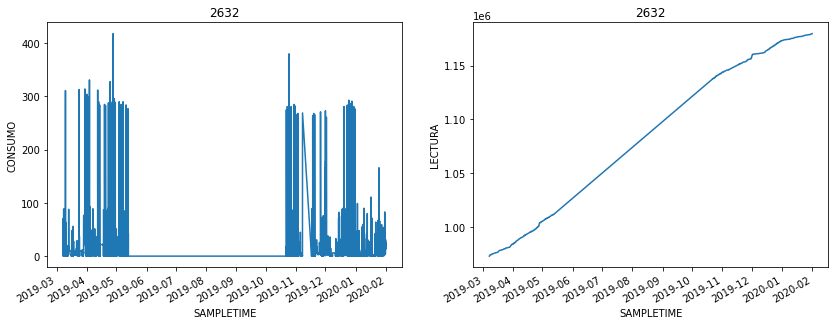

In [ ]:
for ID in contadores_error_6:
  plot(proyecto.contadores[ID].datos_contador["CONSUMO"],proyecto.contadores[ID].datos_contador["LECTURA"],ID)

## CORRELACIÓN Y GRÁFICAS VARIAS
### Descomposición de la serie temporal del contador 0 en tendencia, estacionalidad y residuo.
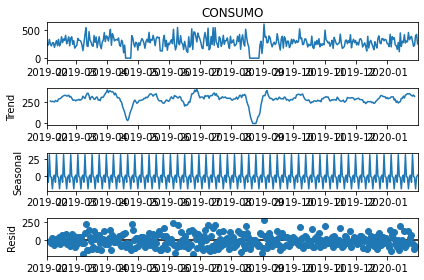

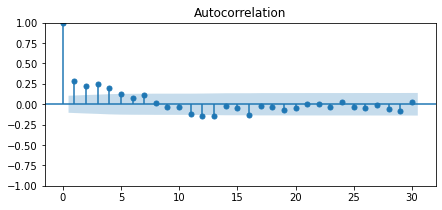


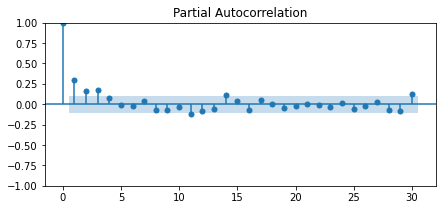

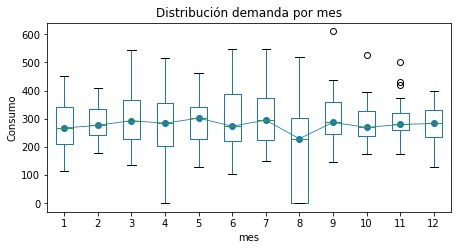

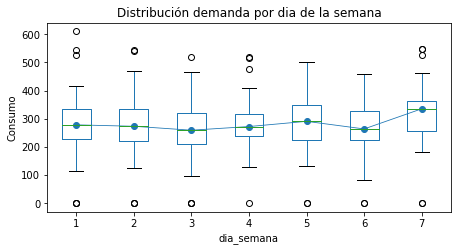

**################################################################################**

# **EVOLUCIÓN ENFOQUES REALIZADOS:** 
## PREPROCESADO IGUAL PARA TODOS LOS ENFOQUES: 
*   Series temporales sin datos finales. 
*   Series temporales sin suficientes datos con un umbral de 100 dias.
          



## **1.APLICAR DIRECTAMENTE EL MODELO REGRESIVO RANDOMFOREST SKFORESCAST**
### RMSE=637.53

## **ENTREGABLE COMPROBACIÓN MITAD CONCURSO NIVEL LOCAL DOS PREDICCIONES**.
### Táctica aplicada: Entregar dos predicciones donde solo varie una variable,  los datos que no llegan temporalmente al final como también el umbral de datos, uno de los entregable estos datos seran igual a la media y el otro entregable a 0.

## RESULTADO: Misma posición en los dos entregables y mismo error, esto nos permite no considerar los datos que no llegan temporalmente al ultimo dia como también el umbral(dias mínimos).
### ERROR RMSE: 490000000

## **2.SELECCIONAR MODELO Y PREPROCESAMIENTO NECESARIO PARA CADA CONTADOR DE FORMA INDEPENDIENTE**



##OPCIONES 

*   *APLICAMOS GRID BUSQUEDA HIPERPARAMETROS*
*   *NO NORMALIZAR*
*   NORMALIZACIÓN DISTRIBUCIÓN NORMAL
*   NORMALIZACIÓN MÍNIMO-MÁXIMO
*   *GRADO ELIMINACIÓN OUTLIERS*
*   *MEDIAS MOVILES 1,2,3,4,5,6,7 y 30*







### **2.1 AL UTILIZAR UN MODELO RANDOM FOREST NO ES NECESARIO NORMALIZACIÓN**

## **2.2 APLICAMOS GRID BUSQUEDA HIPERPARAMETROS PARA CADA CONTADOR:** ##
  ### Valores grid: 

> param_grid = {'n_estimators': [100,200], 'max_depth': [3, 5, 10]}

> len(self.contadores[ID].datos_consumo) - 14

> lags_grid = [14, 30]











CARGANDO DATOS.....


  0%|          | 0/2747 [00:00<?, ?it/s]

GENERANDO CONTADORES.....


numexpr.utils INFO  NumExpr defaulting to 6 threads.
 15%|█▍        | 410/2747 [00:00<00:00, 4098.94it/s]

PROCESO DE CARGA FINALIZADO


  0%|          | 0/2747 [00:00<?, ?it/s]

ENTRENANDO MODELOS.....


  4%|▎         | 100/2747 [00:00<00:02, 993.06it/s]

CALCULANDO RMSE.....


100%|██████████| 2747/2747 [00:02<00:00, 1238.84it/s]


RMSE PROMEDIO:  459.90295859541044    RMSE SUMA:  1240358.279331822


100%|██████████| 2747/2747 [00:00<00:00, 263396.50it/s]

GUARDANDO MODELOS.....


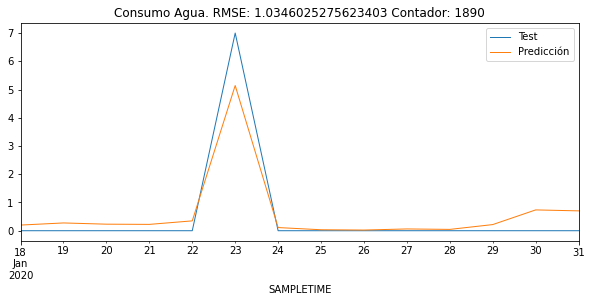

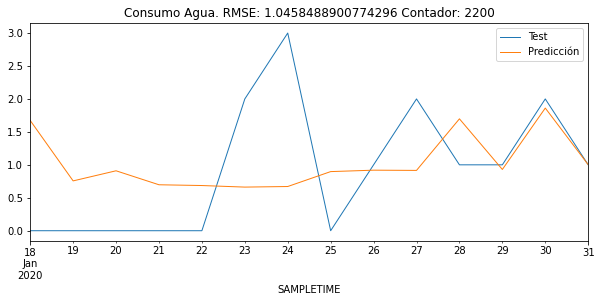

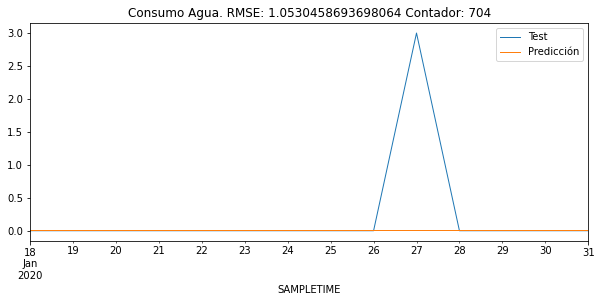

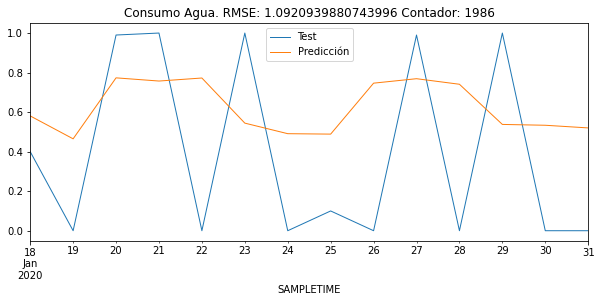

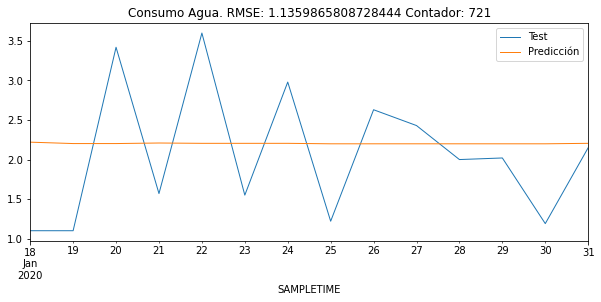

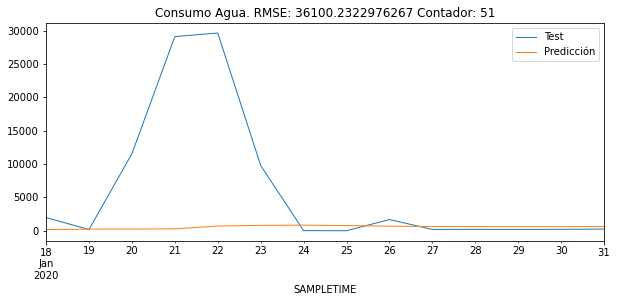

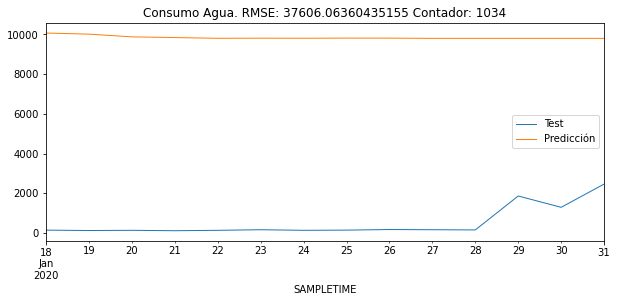

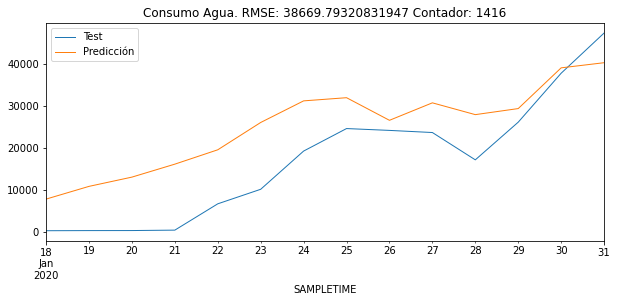

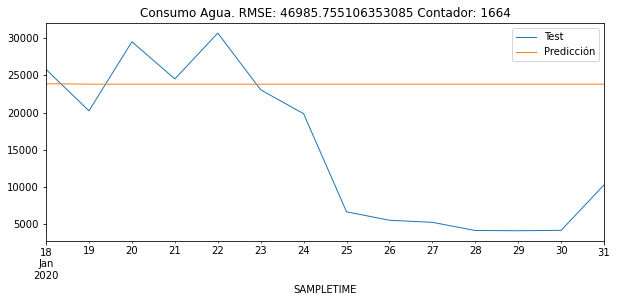

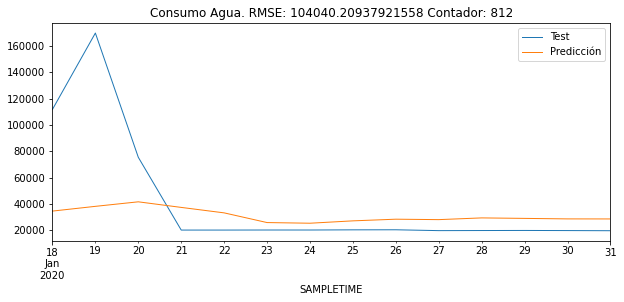

In [ ]:
Proyecto = CajaMar_Water('Modelar_UH2022.txt')
Proyecto.PartirDatos()
Proyecto.Entrenamiento(Grid=True)
Proyecto.Calculo_RMSE()
Proyecto.Mejor_Peor_Resultado(cantidad=5)
# GUARDAMOS CONFIGURACIÓN DEL MEJOR MODELO EN EXCEL
Proyecto.Guardar_Modelos(Excel=True)
# RELLENADO RMSE_Train y RMSE_Test y model con el mejor modelo
# VOLVEMOS A JUNTAR LOS 14 DIAS
#for contador in Proyecto.contadores:
#    contador.Juntar_Datos()
#Proyecto.Entrenamiento()
#Proyecto.GenerarResultados(equipo='GRID')
#print(Proyecto.RMSE_Test_Promedio,Proyecto.RMSE_Test_Suma)

In [ ]:
Conf_model_Lag = []
Conf_model_max_depth = []
Conf_model_n_estimators = []
Conf_model_ID = []

for contador in tqdm(Proyecto.contadores):
    if isinstance(contador.model,ForecasterAutoreg): 
        Conf_model_Lag.append(contador.Mejor_Lag)
        Conf_model_max_depth.append(contador.Mejor_Parametro['max_depth'])
        Conf_model_n_estimators.append(contador.Mejor_Parametro['n_estimators'])
        Conf_model_ID.append(contador.ID)

Res = pd.DataFrame()
Res['Lag'] = Conf_model_Lag
Res['max_depth'] = Conf_model_max_depth
Res['n_estimators'] = Conf_model_n_estimators
Res.index = Conf_model_ID

Res.to_excel('Conf_modelos.xlsx')

100%|██████████| 2747/2747 [00:00<00:00, 252575.86it/s]



### MEJOR RESULTADO:


> RMSE PROMEDIO: 459.90295859541044


> RMSE SUMA: 1240358.279331822

### SE GUARDA LA CONFIGURACION DE CADA ID EN:


> Conf_modelos.xlsx


## **2.3 APLICAMOS GRID PARA MEDIAS MOVILES** ###
### Valores grid:


> RMSE_MOV_1

> RMSE_MOV_2

> RMSE_MOV_3

> RMSE_MOV_4

> RMSE_MOV_5

> RMSE_MOV_6

> RMSE_MOV_10

> RMSE_MOV_30








In [ ]:
Proyecto.PartirDatos()
Resultados = pd.DataFrame()
RMSE = []
for x in [1,2,3,4,5,6,10,30]:
    Proyecto.Entrenamiento(media=x)
    Proyecto.Calculo_RMSE()
    for contadores in Proyecto.contadores:
        RMSE.append(contadores.RMSE_Test)
    Resultados['RMSE_MOV_'+str(x)] = RMSE
    RMSE = []

ID = []
for contador in Proyecto.contadores:
    ID.append(contador.ID)

Resultados.index = ID
Resultados


100%|██████████| 2747/2747 [00:02<00:00, 1208.56it/s]


,RMSE_MOV_1,RMSE_MOV_2,RMSE_MOV_3,RMSE_MOV_4,RMSE_MOV_5,RMSE_MOV_6,RMSE_MOV_10,RMSE_MOV_30
0,184.928347,227.741057,185.605378,177.781313,254.458780,284.340697,295.956611,235.888285
1,98.653054,92.867482,105.211486,86.262787,107.938375,123.171039,92.156809,101.875833
2,18.370650,11.404387,14.938565,14.622526,16.750119,18.921004,23.946102,18.292402
3,209.295189,189.454016,385.725907,233.260561,149.722191,282.187214,163.946228,177.489212
4,322.519759,319.695276,332.921016,336.460641,351.071528,336.776261,279.810278,117.543001
...,...,...,...,...,...,...,...,...
2746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2748,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112
2749,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450


### CALCULAMOS EL MINIMO VALOR DE RMSE SEGÚN LA MEDIA MOVIL UTILIZADA PARA CADA CONTADOR Y LO GUARDAMOS

In [ ]:
Mejor = []
RMSE_Mejor = []
for index, data in Resultados.iterrows():
    Mejor.append(data.argmin())
    RMSE_Mejor.append(data[data.argmin()])
Resultados['Mejor_RMSE'] = RMSE_Mejor
Resultados['Mejor'] = Mejor
Resultados

,RMSE_MOV_1,RMSE_MOV_2,RMSE_MOV_3,RMSE_MOV_4,RMSE_MOV_5,RMSE_MOV_6,RMSE_MOV_10,RMSE_MOV_30,Mejor_RMSE,Mejor
0,184.928347,227.741057,185.605378,177.781313,254.458780,284.340697,295.956611,235.888285,177.781313,3
1,98.653054,92.867482,105.211486,86.262787,107.938375,123.171039,92.156809,101.875833,86.262787,3
2,18.370650,11.404387,14.938565,14.622526,16.750119,18.921004,23.946102,18.292402,11.404387,1
3,209.295189,189.454016,385.725907,233.260561,149.722191,282.187214,163.946228,177.489212,149.722191,4
4,322.519759,319.695276,332.921016,336.460641,351.071528,336.776261,279.810278,117.543001,117.543001,7
...,...,...,...,...,...,...,...,...,...,...
2746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2748,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,7.299112,0
2749,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0.652450,0


### SE ESCOGE EL MEJOR RESULTADO

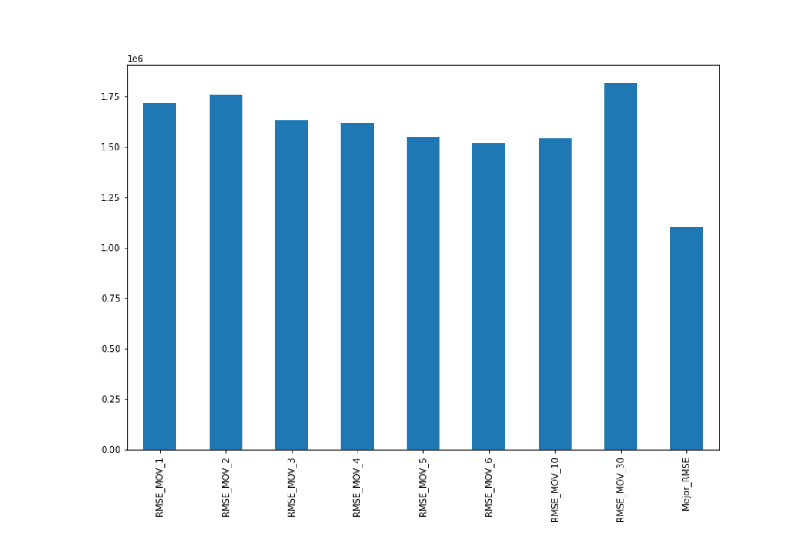

## **2.4 GRADO ELEMINACIÓN OUTLIERS**

### 8 desviaciones


> RMSE PROMEDIO:  425.29976884140524


> RMSE SUMA:  1147033.47656527




### 5 desviaciones

> RMSE PROMEDIO:  409.39038226252393    

> RMSE SUMA:  1104125.860962027





### 3 desviaciones


> **RMSE PROMEDIO:  366.60265326039587**

>  **RMSE SUMA:  988727.3558432877**





## **MEJOR RESULTADO CON:**


> GRID HIPERPARAMETROS


> NO NORMALIZAR


> GRID MEDIAS MOVILES 1,2,3,4,5,6,7 y 30


> GRADO ELIMINACIÓN OUTLIERS A 3 DESVIACIONES


## **RMSE PROMEDIO: 366.60265326039587**
## **RMSE SUMA: 988727.3558432877**




